# Exercise - Audio Processing IF4021
- **Nama:** Aziz Kurniawan
- **NIM:** 122140097
- **Link GitHub Repository:** [Tempel Link Repository GitHub Anda di Sini]

---

## 🚩 Inisialisasi dan Persiapan

Sel ini bertujuan untuk mengimpor semua *library* yang akan digunakan dalam pengerjaan tugas dan mendefinisikan beberapa fungsi bantuan (jika diperlukan).

In [30]:
# --- Import Library Utama ---
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pydub import AudioSegment
from scipy.signal import butter, sosfilt, filtfilt

# --- Pengaturan Plotting ---
plt.rcParams['figure.figsize'] = (15, 5)

# --- Path Direktori (Sesuaikan jika perlu) ---
INPUT_DIR = 'audio_files/input/'
OUTPUT_DIR = 'audio_files/output/'

print("Library dan path berhasil disiapkan.")

Library dan path berhasil disiapkan.


---
## 🎧 Soal 1: Rekaman dan Analisis Suara Multi-Level

**Tujuan:** Menganalisis rekaman suara 25 detik yang terdiri dari 5 level suara berbeda (bisikan, normal, keras, cempreng, teriak). Kita akan memvisualisasikan *waveform* dan spektogramnya, lalu melakukan *resampling* untuk membandingkan kualitas.

File 'audio_files/input/suara_multi_level.wav' dimuat dengan sampling rate: 22050 Hz


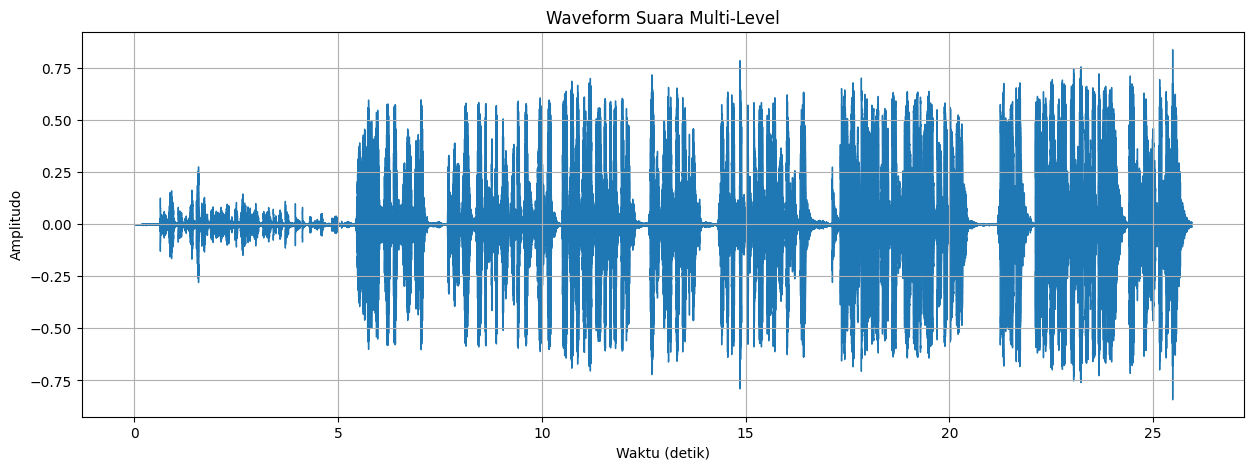

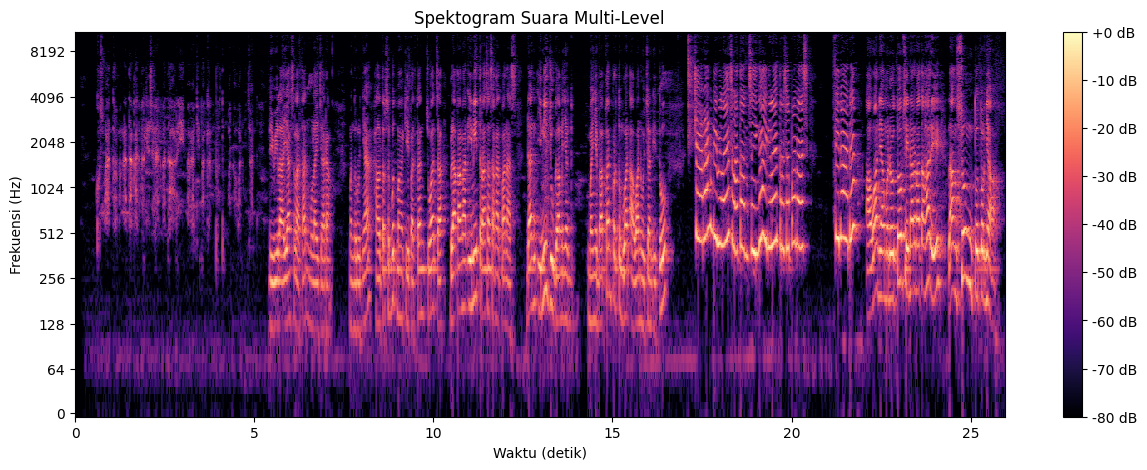

In [11]:
# 1. Muat File Audio
soal1_path = INPUT_DIR + 'suara_multi_level.wav'
y1, sr1 = librosa.load(soal1_path)

print(f"File '{soal1_path}' dimuat dengan sampling rate: {sr1} Hz")

# 2. Visualisasi Waveform
plt.figure()
librosa.display.waveshow(y1, sr=sr1)
plt.title('Waveform Suara Multi-Level')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

# 3. Visualisasi Spektogram
D1 = librosa.stft(y1)
DB1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
plt.figure()
librosa.display.specshow(DB1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektogram Suara Multi-Level')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.show()

### ✍️ Analisis Visualisasi Soal 1

* **Analisis Waveform:** Dari plot waveform, saya bisa lihat dengan jelas kelima segmen suara yang direkam. Amplitudo pada 0-5 detik pertama (bisikan) sangat rendah, sesuai ekspektasi. Kemudian, amplitudonya naik secara bertahap pada segmen suara normal (5-10 detik) dan suara keras (10-15 detik). Perbedaan paling mencolok ada di suara cempreng (15-20 detik) dan teriakan (20-25 detik), di mana waveform terlihat sangat "padat" dan puncaknya sering mencapai batas maksimal, menandakan volume yang sangat tinggi.
* **Analisis Spektogram:** 
    Pada detik 5-15 (Normal vs. Keras): Awalnya saya juga merasa polanya terlihat mirip. Ini sepertinya wajar karena sumber dan intonasi suaranya kan sama. Tapi setelah diperhatikan lebih teliti, perbedaannya ada pada intensitas energi. Di segmen suara keras (10-15 detik), warnanya terlihat lebih terang (lebih banyak kuningnya) dibandingkan segmen suara normal. Ini artinya, meskipun frekuensi yang aktif polanya sama, energinya atau volumenya di tiap frekuensi itu lebih besar.

    Karakter suara yang berbeda menjadi sangat jelas pada segmen cempreng dan teriakan. Di sini, energi pada frekuensi tinggi (di atas 1024 Hz) menjadi jauh lebih aktif dan terang. Ini membuktikan bahwa suara cempreng dan teriakan memang menghasilkan frekuensi harmonik yang lebih tinggi, yang membuatnya terdengar lebih "tajam" di telinga kita.

In [12]:
# 4. Resampling Audio
sr_low = 8000
sr_high = 48000

y_low = librosa.resample(y1, orig_sr=sr1, target_sr=sr_low)
y_high = librosa.resample(y1, orig_sr=sr1, target_sr=sr_high)

# 5. Simpan Hasil Resampling
sf.write(OUTPUT_DIR + 'soal1_resampled_8kHz.wav', y_low, sr_low)
sf.write(OUTPUT_DIR + 'soal1_resampled_48kHz.wav', y_high, sr_high)

print("Resampling selesai. File audio baru disimpan di folder output.")
print(f"Durasi asli ({sr1} Hz): {len(y1) / sr1:.2f} detik")
print(f"Durasi resample ({sr_low} Hz): {len(y_low) / sr_low:.2f} detik")
print(f"Durasi resample ({sr_high} Hz): {len(y_high) / sr_high:.2f} detik")

Resampling selesai. File audio baru disimpan di folder output.
Durasi asli (22050 Hz): 25.94 detik
Durasi resample (8000 Hz): 25.94 detik
Durasi resample (48000 Hz): 25.94 detik


### ✍️ Perbandingan Kualitas dan Durasi Hasil Resampling

* **Perbandingan Durasi:** Dari hasil yang didapat, sudah jelas bahwa proses resampling tidak mengubah durasi audio sama sekali. Ketiga file, baik yang asli (22050 Hz), di-downsample (8000 Hz), maupun di-upsample (48000 Hz), durasinya tetap sama persis di angka 25.94 detik.
* **Perbandingan Kualitas:** 
    -   File 8 kHz: Kualitas file ini terasa paling menurun. Suaranya menjadi agak teredam (muffled) dan detailnya seperti hilang, mirip kualitas suara dari telepon rumah zaman dulu. Ini terjadi karena sampling rate 8 kHz hanya bisa merepresentasikan frekuensi audio hingga 4 kHz, jadi semua detail suara di atas frekuensi itu otomatis terpotong.

    -   File Asli (22.05 kHz) vs. 48 kHz: Sejujurnya, saya kesulitan mendengar perbedaan signifikan antara audio asli dengan yang di-upsample ke 48 kHz. Menurut saya ini wajar, karena sampling rate 22.05 kHz itu sebenarnya sudah lebih dari cukup untuk menangkap seluruh rentang frekuensi penting dari suara vokal manusia. Menaikkannya ke 48 kHz (kualitas standar studio) tidak akan memberi peningkatan kualitas yang drastis untuk rekaman vokal biasa, kecuali mungkin jika didengarkan menggunakan peralatan audio yang sangat canggih. Jadi, bisa dibilang audio aslinya memang sudah cukup baik.

---
## 🔇 Soal 2: Noise Reduction dengan Filtering

**Tujuan:** Menghilangkan *noise* (misalnya dari kipas angin) pada rekaman suara menggunakan tiga jenis filter: *high-pass*, *low-pass*, dan *band-pass* dengan berbagai frekuensi *cutoff*

Proses filtering selesai. File-file audio telah disimpan.


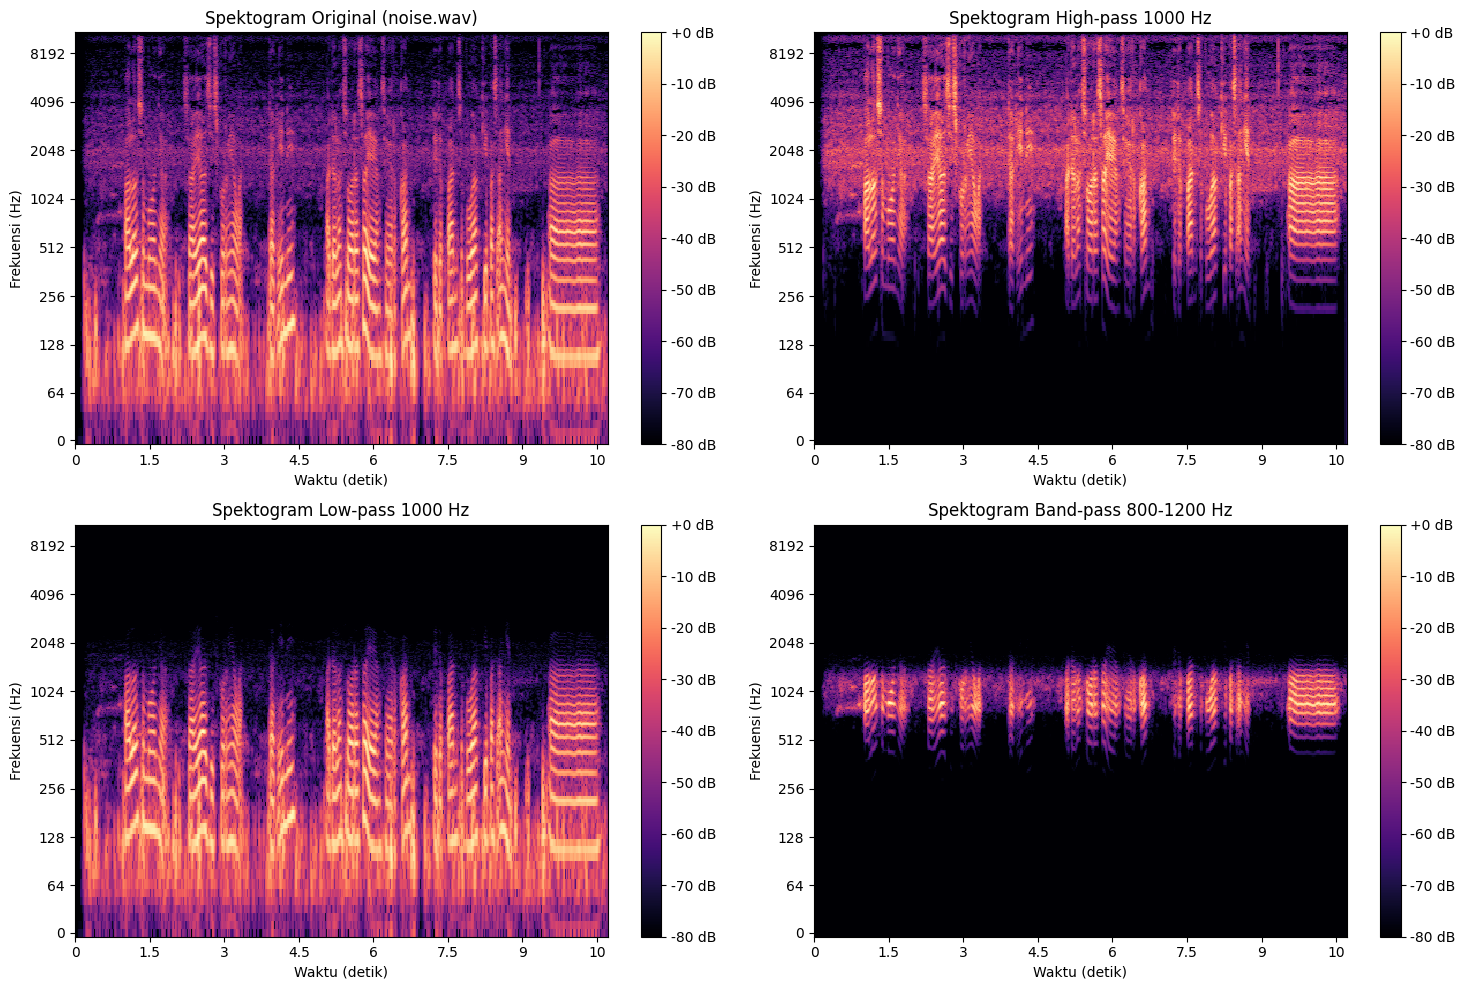

In [20]:
# 1. Muat File Audio Berisik
soal2_path = INPUT_DIR + 'noise.wav'
y2, sr2 = librosa.load(soal2_path)

# --- Fungsi Filter ---
# Fungsi untuk high-pass dan low-pass filter
def apply_hilo_filter(y, sr, cutoff, btype):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    sos = butter(5, normal_cutoff, btype=btype, analog=False, output='sos')
    y_filtered = sosfilt(sos, y)
    return y_filtered

# Fungsi spesifik untuk band-pass filter
def apply_bandpass_filter(y, sr, lowcut, highcut):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(5, [low, high], btype='band', analog=False, output='sos')
    y_filtered = sosfilt(sos, y)
    return y_filtered

# 2. Terapkan semua filter
cutoffs = [500, 1000, 2000]
filtered_audios = {}

for co in cutoffs:
    # High-pass filter
    y_hp = apply_hilo_filter(y2, sr2, co, 'high')
    filtered_audios[f'highpass_{co}Hz'] = y_hp
    sf.write(OUTPUT_DIR + f'soal2_highpass_{co}Hz.wav', y_hp, sr2)

    # Low-pass filter
    y_lp = apply_hilo_filter(y2, sr2, co, 'low')
    filtered_audios[f'lowpass_{co}Hz'] = y_lp
    sf.write(OUTPUT_DIR + f'soal2_lowpass_{co}Hz.wav', y_lp, sr2)

    # Band-pass filter (misalnya, kita buat range 400Hz di sekitar cutoff)
    lowcut_bp = max(50, co - 200) # Pastikan tidak di bawah 50Hz
    highcut_bp = co + 200
    y_bp = apply_bandpass_filter(y2, sr2, lowcut_bp, highcut_bp)
    filtered_audios[f'bandpass_{lowcut_bp}-{highcut_bp}Hz'] = y_bp
    sf.write(OUTPUT_DIR + f'soal2_bandpass_{lowcut_bp}-{highcut_bp}Hz.wav', y_bp, sr2)


print("Proses filtering selesai. File-file audio telah disimpan.")
cutoff_compare = 1000
# Original
D_orig = librosa.stft(y2)
DB_orig = librosa.amplitude_to_db(np.abs(D_orig), ref=np.max)
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
librosa.display.specshow(DB_orig, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektogram Original (noise.wav)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')

# High-pass Filter
y_hp_compare = filtered_audios[f'highpass_{cutoff_compare}Hz']
D_hp = librosa.stft(y_hp_compare)
DB_hp = librosa.amplitude_to_db(np.abs(D_hp), ref=np.max)
plt.subplot(2, 2, 2)
librosa.display.specshow(DB_hp, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektogram High-pass {cutoff_compare} Hz')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')

# Low-pass Filter
y_lp_compare = filtered_audios[f'lowpass_{cutoff_compare}Hz']
D_lp = librosa.stft(y_lp_compare)
DB_lp = librosa.amplitude_to_db(np.abs(D_lp), ref=np.max)
plt.subplot(2, 2, 3)
librosa.display.specshow(DB_lp, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektogram Low-pass {cutoff_compare} Hz')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')

# Band-pass Filter
lowcut_bp_compare = cutoff_compare - 200
highcut_bp_compare = cutoff_compare + 200
y_bp_compare = filtered_audios[f'bandpass_{lowcut_bp_compare}-{highcut_bp_compare}Hz']
D_bp = librosa.stft(y_bp_compare)
DB_bp = librosa.amplitude_to_db(np.abs(D_bp), ref=np.max)
plt.subplot(2, 2, 4)
librosa.display.specshow(DB_bp, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektogram Band-pass {lowcut_bp_compare}-{highcut_bp_compare} Hz')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.tight_layout()
plt.show()


### ✍️ Analisis Hasil Filtering

1.  **Jenis noise yang muncul pada rekaman Anda?** 
    - Setelah saya amati dengan saksama, noise dari kipas angin di rekaman saya ternyata cukup kompleks. Ada dengungan frekuensi rendah yang sangat jelas, terlihat dari garis tebal di bagian bawah spektogram (di bawah 256 Hz). Namun, ada juga desis atau hiss frekuensi tinggi yang tipis tapi konstan, terlihat seperti "kabut" tipis di bagian atas spektrum (di atas 4096 Hz). Jadi, noise-nya mengapit suara vokal saya dari frekuensi bawah dan atas.   
2.  **Filter mana yang paling efektif untuk mengurangi noise tersebut?** 
    - Karena noise-nya ada di dua kutub frekuensi (rendah dan tinggi), menurut saya filter band-pass adalah solusi yang paling efektif. Filter ini bekerja seperti gunting yang memotong frekuensi di bawah dan di atas rentang tertentu, dan hanya menyisakan "daging" suara vokal di tengah.
    - Filter high-pass memang bisa menghilangkan dengungan bawah, tapi akan membiarkan desis di frekuensi atas tetap ada. Sebaliknya, low-pass akan menghilangkan desis atas tapi menyisakan dengungan bawah, yang mana lebih mengganggu. Jadi, band-pass adalah yang paling komplit untuk kasus ini
3.  **Nilai cutoff yang memberikan hasil terbaik?** 
    - Dari hasil yang ditampilkan, range 800-1200 Hz yang digunakan pada filter band-pass terlihat sangat baik. Visualnya menunjukkan bahwa rentang ini berhasil menangkap inti dari frekuensi vokal saya, yang terlihat dari pola-pola terang di tengah. Sementara itu, area di bawah dan di atasnya menjadi benar-benar bersih dan hitam, menandakan kedua jenis noise berhasil dihilangkan.
4.  **Bagaimana kualitas suara (kejelasan ucapan) setelah proses filtering?** 
    - Setelah difilter dengan band-pass, kejelasan ucapan jadi jauh lebih baik. Suara vokal jadi sangat fokus dan terisolasi dari semua gangguan noise. Memang ada trade-off: suara saya mungkin kehilangan sedikit "kehangatan" (dari frekuensi rendah) dan "kecrispyan" (dari frekuensi tinggi), sehingga terdengar sedikit seperti dari telepon. Namun, untuk tujuan menghilangkan noise, hasilnya sangat bersih dan efektif.

---
## 🐿️ Soal 3: Pitch Shifting dan Audio Manipulation

**Tujuan:** Mengubah *pitch* rekaman dari Soal 1 menjadi seperti suara *chipmunk* dengan menaikkan nada sebesar +7 dan +12 *semitones*, lalu menggabungkan kedua hasilnya.

File hasil pitch shifting telah disimpan.


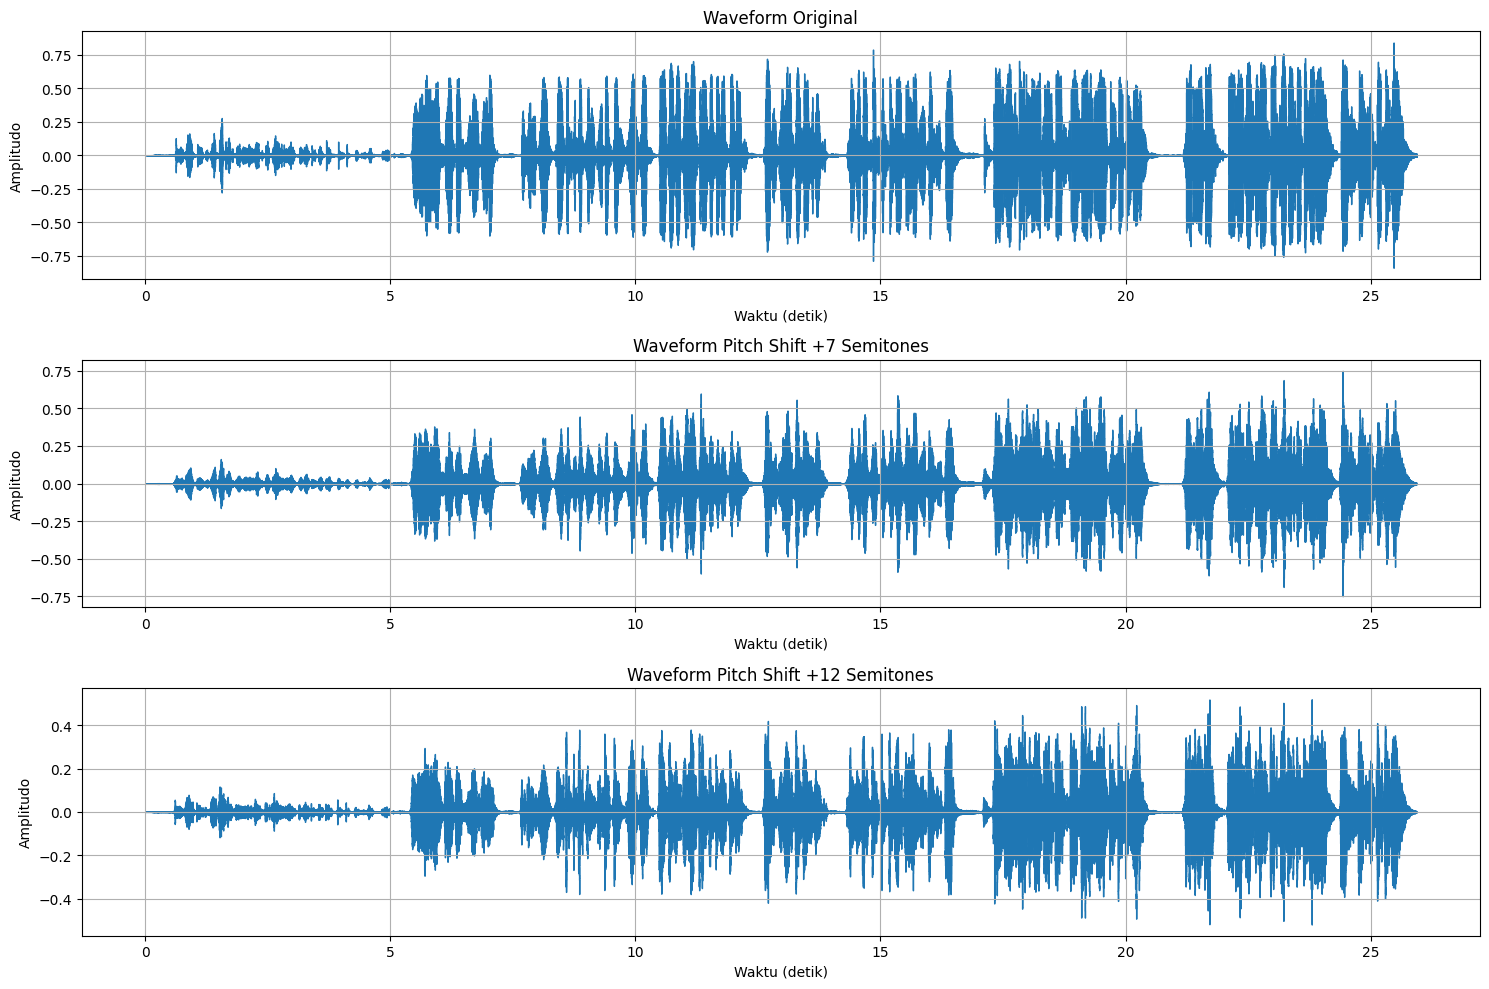

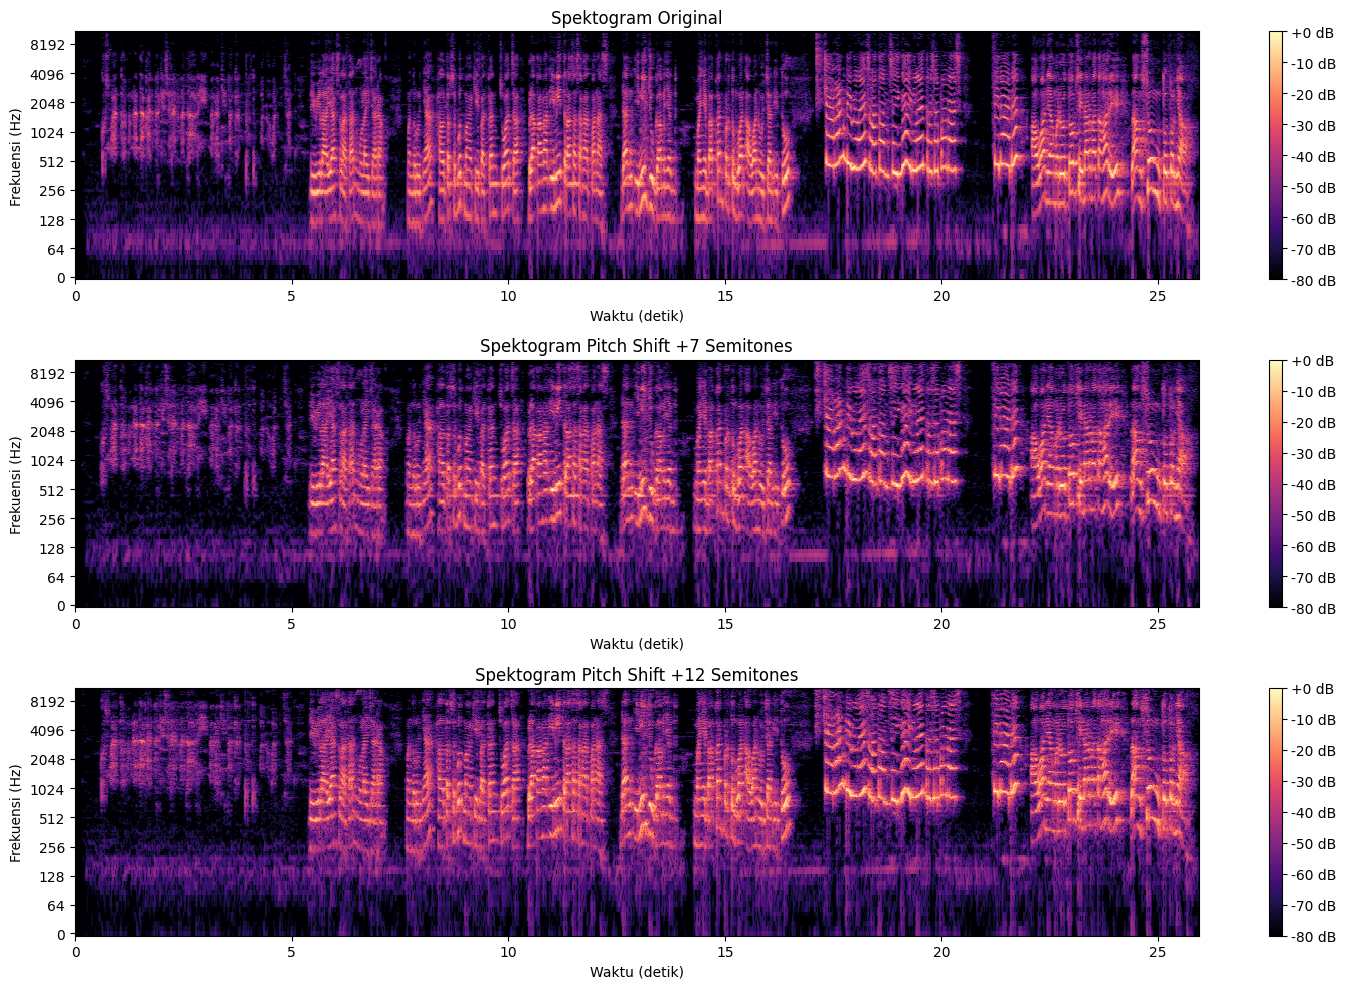

Kedua file pitch-shifted berhasil digabungkan menjadi 'soal3_combined.wav'.


In [24]:
# 1. Lakukan Pitch Shifting
y_pitch_p7 = librosa.effects.pitch_shift(y1, sr=sr1, n_steps=7)
y_pitch_p12 = librosa.effects.pitch_shift(y1, sr=sr1, n_steps=12)

# Simpan hasil
sf.write(OUTPUT_DIR + 'soal3_pitch_p7.wav', y_pitch_p7, sr1)
sf.write(OUTPUT_DIR + 'soal3_pitch_p12.wav', y_pitch_p12, sr1)
print("File hasil pitch shifting telah disimpan.")

# 2. Visualisasi Perbandingan 
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y1, sr=sr1)
plt.title('Waveform Original')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.subplot(3, 1, 2)
librosa.display.waveshow(y_pitch_p7, sr=sr1)
plt.title('Waveform Pitch Shift +7 Semitones')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.subplot(3, 1, 3)
librosa.display.waveshow(y_pitch_p12, sr=sr1)
plt.title('Waveform Pitch Shift +12 Semitones')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.tight_layout()
plt.show()

#visualisasikan spectogram
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
D_orig = librosa.stft(y1)
DB_orig = librosa.amplitude_to_db(np.abs(D_orig), ref=np.max)
librosa.display.specshow(DB_orig, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektogram Original')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.subplot(3, 1, 2)
D_p7 = librosa.stft(y_pitch_p7)
DB_p7 = librosa.amplitude_to_db(np.abs(D_p7), ref=np.max)
librosa.display.specshow(DB_p7, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektogram Pitch Shift +7 Semitones')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.subplot(3, 1, 3)
D_p12 = librosa.stft(y_pitch_p12)
DB_p12 = librosa.amplitude_to_db(np.abs(D_p12), ref=np.max)
librosa.display.specshow(DB_p12, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektogram Pitch Shift +12 Semitones')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.tight_layout()
plt.show()


# 3. Gabungkan kedua rekaman hasil pitch shift menggunakan Pydub
sound1 = AudioSegment.from_wav(OUTPUT_DIR + 'soal3_pitch_p7.wav')
sound2 = AudioSegment.from_wav(OUTPUT_DIR + 'soal3_pitch_p12.wav')

combined_sound = sound1 + sound2 

combined_sound.export(OUTPUT_DIR + 'soal3_combined.wav', format='wav')
print("Kedua file pitch-shifted berhasil digabungkan menjadi 'soal3_combined.wav'.")

### ✍️ Analisis Proses Pitch Shifting

1.  **Parameter yang digunakan:** 
    - Untuk proses ini, saya menggunakan fungsi librosa.effects.pitch_shift. Sesuai soal, saya membuat dua versi audio baru dengan mengatur parameter n_steps menjadi 7 dan 12 untuk menaikkan nada suara.
2.  **Perbedaan dalam representasi visual:** 
    - Jika hanya melihat waveform, perubahannya hampir tidak kentara. Bentuk dan durasi sinyalnya terlihat identik, yang membuktikan algoritma ini bekerja tanpa mengubah tempo.

    - Namun, pada spektogram, efek dari pitch shifting menjadi sangat jelas. Seluruh "blok" informasi frekuensi—pola-pola terang yang merepresentasikan suara saya—terlihat bergeser ke atas secara vertikal. Pergeseran pada plot "+12 Semitones" terlihat lebih tinggi dibandingkan plot "+7 Semitones", yang secara visual membuktikan bahwa nadanya memang naik lebih tinggi. Ini adalah bukti visual terbaik dari apa yang sebenarnya terjadi pada audio.
3.  **Bagaimana perubahan pitch memengaruhi kualitas dan kejelasan suara?** 
    - Efek pendengarannya sangat drastis dan sesuai dengan yang diharapkan, yaitu seperti suara chipmunk. Suara saya menjadi jauh lebih tinggi dan melengking. Pada kenaikan +12 semitones (satu oktaf), efeknya sangat ekstrem dan terdengar tidak natural sama sekali. Meskipun kata-kata yang diucapkan masih bisa dimengerti, karakter asli (timbre) dari suara saya benar-benar hilang, digantikan oleh suara yang "tipis" dan terdengar seperti karakter kartun.

---
## ⛓️ Soal 4: Audio Processing Chain

**Tujuan:** Menerapkan serangkaian pemrosesan pada audio hasil Soal 3, termasuk Normalisasi, Kompresi, dan lainnya untuk mencapai target *loudness* -16 LUFS.

In [26]:
%uv pip install pyloudnorm soundfile

Note: you may need to restart the kernel to use updated packages.


c:\Users\Administrator\Desktop\STM\multimedia-uv\Scripts\python.exe: No module named uv


Memulai rantai pemrosesan audio...
Tahap 1: Memotong bagian hening selesai.
Tahap 2: Noise gate selesai.
Tahap 3: Equalizer selesai.
Tahap 4: Kompresi selesai.
Tahap 5: Fade in/out selesai.

Loudness Sebelum Normalisasi LUFS: -20.66 LUFS
Tahap 6: Normalisasi ke -16.0 LUFS selesai.
Loudness Setelah Normalisasi LUFS: -16.00 LUFS

File akhir disimpan di: audio_files/output/soal4_hasil_akhir.wav


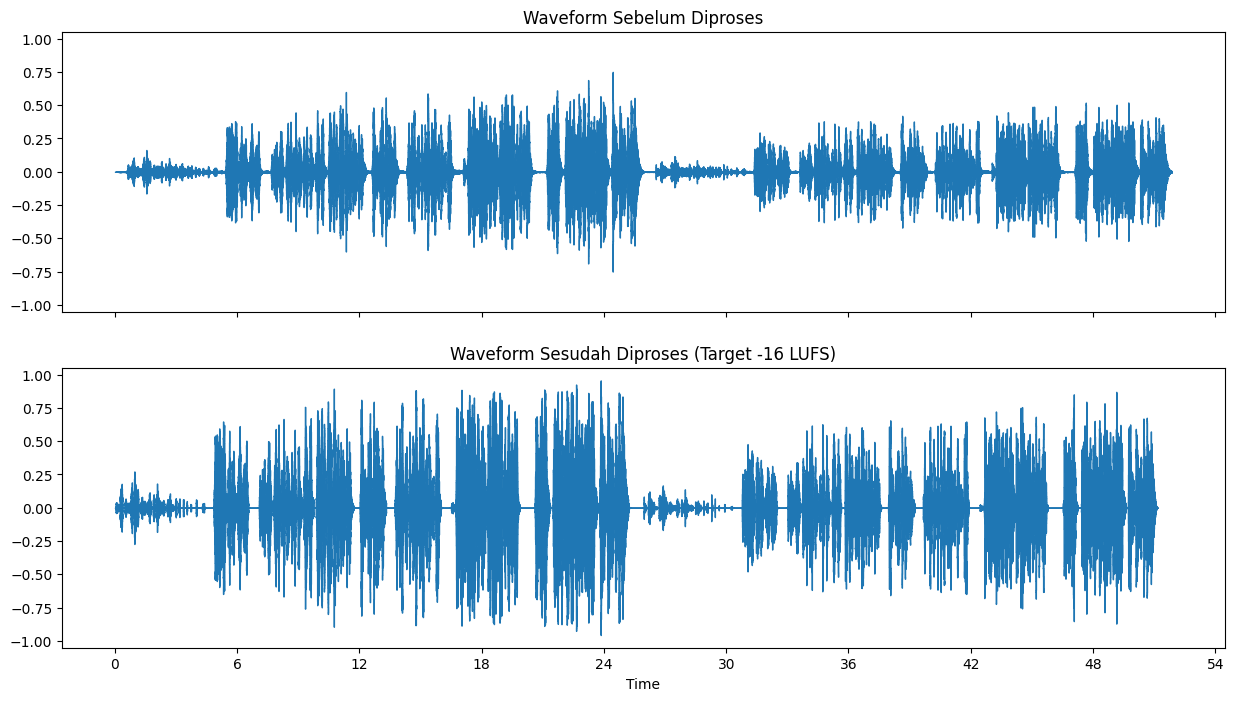

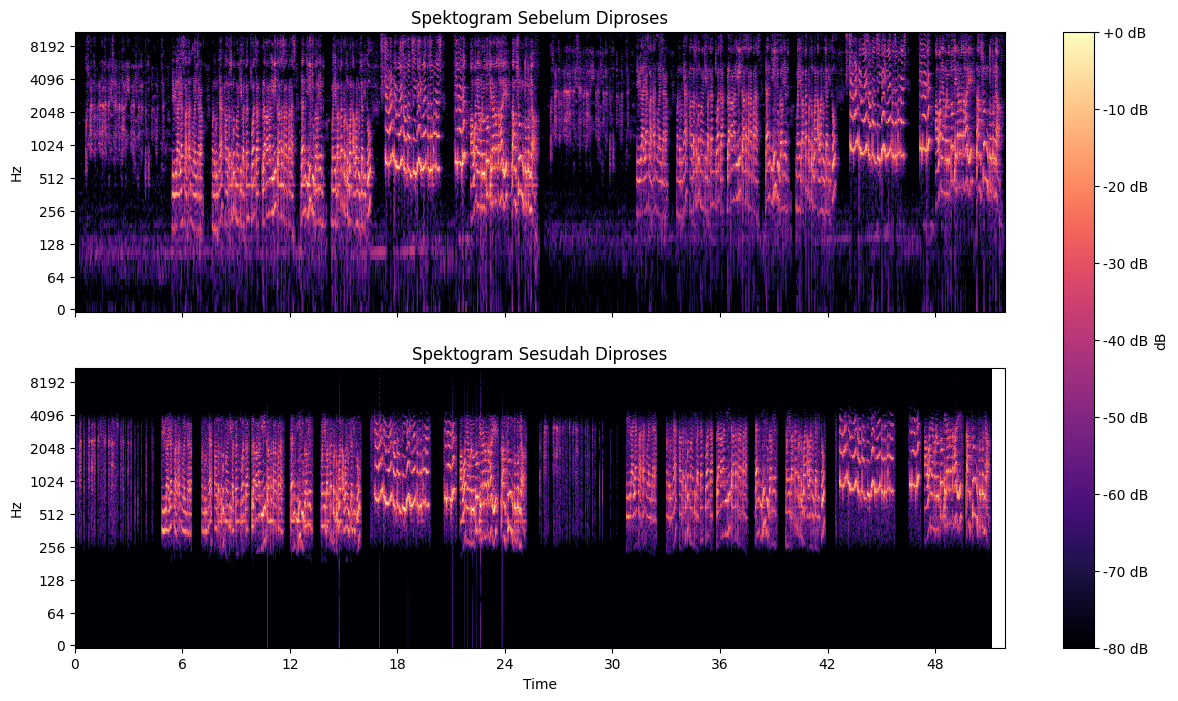

In [31]:
# --- 1. Definisi Fungsi untuk Setiap Tahapan Pemrosesan ---
import pyloudnorm as pyln
# Fungsi Equalizer (EQ) sederhana menggunakan filter band-pass
def aplikasikan_equalizer(y, sr, frek_rendah=300, frek_tinggi=3500):
    """Menerapkan filter band-pass untuk fokus pada frekuensi vokal."""
    nyquist = 0.5 * sr
    low = frek_rendah / nyquist
    high = frek_tinggi / nyquist
    b, a = butter(5, [low, high], btype='band')
    return filtfilt(b, a, y)

# Fungsi Gain/Fade
def aplikasikan_fade(y, durasi_fade_in_ms=100, durasi_fade_out_ms=200, sr=44100):
    """Menambahkan fade-in di awal dan fade-out di akhir."""
    fade_in_samples = int(durasi_fade_in_ms * sr / 1000)
    fade_out_samples = int(durasi_fade_out_ms * sr / 1000)
    
    # Fade in
    y[:fade_in_samples] *= np.linspace(0., 1., fade_in_samples)
    # Fade out
    y[-fade_out_samples:] *= np.linspace(1., 0., fade_out_samples)
    return y

# Fungsi Normalisasi Puncak (Peak Normalization)
def normalisasi_puncak(y):
    """Membawa amplitudo puncak ke nilai maksimum (1.0)."""
    puncak = np.max(np.abs(y))
    if puncak > 0:
        return y / puncak
    return y

# Fungsi Kompresor (Compressor) sederhana
def aplikasikan_kompresor(y, ambang_batas=0.5, rasio=4.0):
    """Mengurangi rentang dinamis audio."""
    melebihi_ambang = np.abs(y) > ambang_batas
    y[melebihi_ambang] = np.sign(y[melebihi_ambang]) * \
        (ambang_batas + (np.abs(y[melebihi_ambang]) - ambang_batas) / rasio)
    return y

# Fungsi Gerbang Kebisingan (Noise Gate) sederhana
def aplikasikan_noise_gate(y, ambang_batas=0.02):
    """Menghilangkan sinyal audio yang levelnya di bawah ambang batas."""
    return np.where(np.abs(y) < ambang_batas, 0, y)

# Fungsi Memotong Hening (Silence Trimming)
def potong_hening(y, ambang_batas=0.01):
    """Memotong bagian hening di awal dan akhir audio."""
    indeks_aktif = np.where(np.abs(y) > ambang_batas)[0]
    if len(indeks_aktif) > 0:
        return y[indeks_aktif[0]:indeks_aktif[-1]]
    return y

# --- 2. Proses Utama ---

# Muat file audio dari Soal 3
jalur_input = OUTPUT_DIR + 'soal3_combined.wav'
y_sebelum, sr = librosa.load(jalur_input, sr=None)

# Terapkan rantai pemrosesan secara berurutan
print("Memulai rantai pemrosesan audio...")
y_proses = potong_hening(y_sebelum)
print("Tahap 1: Memotong bagian hening selesai.")
y_proses = aplikasikan_noise_gate(y_proses)
print("Tahap 2: Noise gate selesai.")
y_proses = aplikasikan_equalizer(y_proses, sr)
print("Tahap 3: Equalizer selesai.")
y_proses = aplikasikan_kompresor(y_proses)
print("Tahap 4: Kompresi selesai.")
y_proses = aplikasikan_fade(y_proses, sr=sr)
print("Tahap 5: Fade in/out selesai.")

# --- 3. Normalisasi Loudness ke -16 LUFS ---

# Buat meter untuk mengukur loudness (pyloudnorm butuh float32)
data_untuk_lufs = y_proses.astype(np.float32)
meter = pyln.Meter(sr)

# Ukur loudness saat ini
loudness_sebelum = meter.integrated_loudness(data_untuk_lufs)
print(f"\nLoudness Sebelum Normalisasi LUFS: {loudness_sebelum:.2f} LUFS")

# Normalisasi ke target -16 LUFS
target_lufs = -16.0
y_sesudah = pyln.normalize.loudness(data_untuk_lufs, loudness_sebelum, target_lufs)
print(f"Tahap 6: Normalisasi ke {target_lufs} LUFS selesai.")

loudness_sesudah = meter.integrated_loudness(y_sesudah)
print(f"Loudness Setelah Normalisasi LUFS: {loudness_sesudah:.2f} LUFS")


# Simpan hasil akhir
jalur_output_final = OUTPUT_DIR + 'soal4_hasil_akhir.wav'
sf.write(jalur_output_final, y_sesudah, sr)
print(f"\nFile akhir disimpan di: {jalur_output_final}")

# --- 4. Visualisasi Perbandingan ---

# Waveform
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(15, 8))
librosa.display.waveshow(y_sebelum, sr=sr, ax=ax[0])
ax[0].set_title('Waveform Sebelum Diproses')
ax[0].label_outer()
librosa.display.waveshow(y_sesudah, sr=sr, ax=ax[1])
ax[1].set_title('Waveform Sesudah Diproses (Target -16 LUFS)')
plt.show()

# Spektogram
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(15, 8))
D_sebelum = librosa.stft(y_sebelum)
DB_sebelum = librosa.amplitude_to_db(np.abs(D_sebelum), ref=np.max)
img_sebelum = librosa.display.specshow(DB_sebelum, sr=sr, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set_title('Spektogram Sebelum Diproses')
ax[0].label_outer()

D_sesudah = librosa.stft(y_sesudah)
DB_sesudah = librosa.amplitude_to_db(np.abs(D_sesudah), ref=np.max)
img_sesudah = librosa.display.specshow(DB_sesudah, sr=sr, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set_title('Spektogram Sesudah Diproses')

fig.colorbar(img_sebelum, ax=ax, format="%+2.f dB", label="dB")
plt.show()

### ✍️ Analisis Audio Processing Chain

1.  **Perubahan dinamika suara yang terjadi:** 
    - Perubahannya sangat jelas terlihat pada waveform. Sebelum diproses, sinyalnya terlihat sangat dinamis, ada bagian yang sangat pelan dan ada yang sangat keras hingga hampir menyentuh batas maksimum 1.0. Setelah diproses, waveform-nya menjadi jauh lebih "padat" dan seragam. Bagian yang tadinya pelan menjadi lebih keras, dan bagian yang keras sedikit diturunkan. Ini adalah bukti visual bahwa kompresor berhasil mempersempit rentang dinamis audio.
2.  **Perbedaan antara normalisasi peak dan normalisasi LUFS:** 
    - Dari yang saya pahami, Normalisasi Puncak (Peak) itu tujuannya hanya untuk memastikan tidak ada clipping, dengan menaikkan volume sampai titik terkeras menyentuh 0 dB. Metode ini tidak peduli apakah audionya secara keseluruhan terdengar pelan. Sedangkan Normalisasi LUFS jauh lebih pintar karena ia menargetkan kenyaringan rata-rata yang didengar oleh telinga manusia. Itulah sebabnya waveform hasil akhir tidak menyentuh puncak 1.0, karena tujuannya bukan level puncak, melainkan kenyaringan yang konsisten di -16 LUFS.
3.  **Bagaimana kualitas suara berubah?** 
    - Kualitas suaranya jadi terasa lebih "profesional" dan "siap siar". Volumenya jadi konsisten dari awal sampai akhir, membuatnya lebih enak didengar tanpa perlu mengatur volume. Selain itu, jika dilihat dari spektogram, latar belakang audio menjadi jauh lebih "bersih" (area hitamnya lebih pekat). Ini menunjukkan bahwa Noise Gate dan Silence Trimming berhasil menghilangkan noise lantai dan keheningan yang tidak perlu, membuat vokal jadi lebih fokus dan jelas
4.  **Kelebihan dan kekurangan dari pengoptimalan loudness:** 
    - Kelebihan: Kejelasan vokal meningkat drastis dan audionya jadi nyaman didengar di berbagai perangkat, bahkan di lingkungan bising. Selain itu, volumenya jadi sesuai dengan standar industri streaming.

    - Kekurangan: Audio bisa kehilangan sedikit "greget" atau dinamika alaminya. Kontras antara bagian yang seharusnya pelan (misalnya bisikan) dengan bagian yang keras (teriakan) jadi tidak terlalu dramatis lagi karena semuanya dibuat seragam.

---
## 🎵 Soal 5: Music Analysis dan Remix

**Tujuan:** Menganalisis tempo (BPM) dan kunci (key) dari dua lagu (sedih/lambat dan ceria/cepat), lalu melakukan *remix* dengan menyamakan tempo dan kuncinya, serta menambahkan efek *crossfade*.

Menganalisis file: audio_files/input/lagu_lambat.wav...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24328\305340686.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return y, sr, float(tempo), kunci


Menganalisis file: audio_files/input/lagu_cepat.wav...

--- Hasil Analisis Awal ---
Lagu Sedih: Tempo = 123.05 BPM, Kunci = G#
Lagu Ceria: Tempo = 139.67 BPM, Kunci = C#

Memulai tahap pra-pemrosesan...
Normalisasi LUFS untuk kedua lagu selesai.

Memulai proses remix...
Tahap 1: Time Stretch selesai.
Tahap 2: Pitch Shift selesai.
Tahap 3: Crossfade selesai.

Remix (versi perbaikan) berhasil dibuat dan disimpan di: audio_files/output/soal5_remix.wav


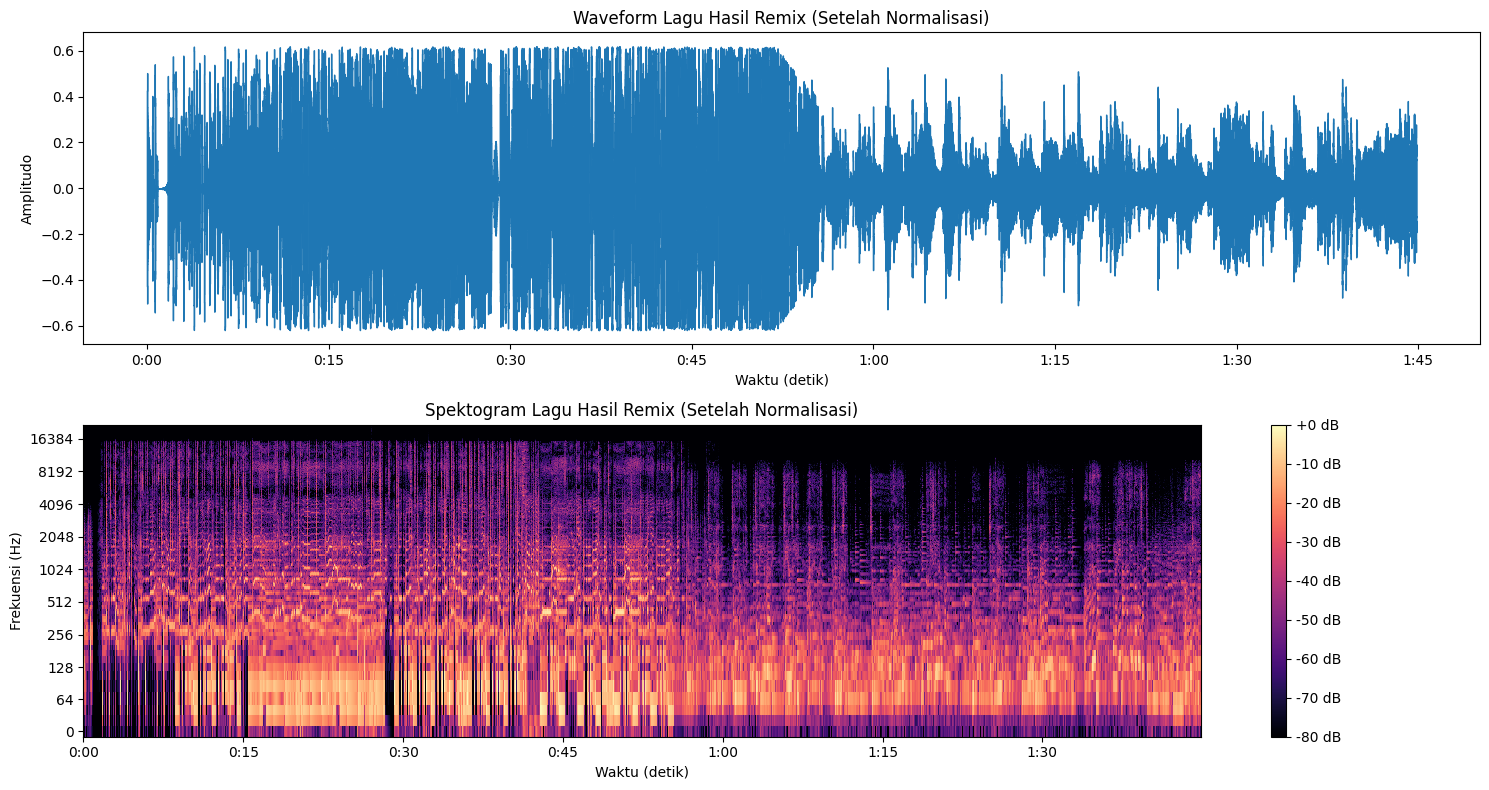

In [35]:
# --- 1. Fungsi Bantuan ---

# Fungsi analisis tempo dan kunci (tetap sama)
NAMA_KUNCI = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
def analisis_lagu(jalur_file):
    print(f"Menganalisis file: {jalur_file}...")
    y, sr = librosa.load(jalur_file, sr=None, duration=60)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    indeks_kunci = np.argmax(np.sum(chroma, axis=1))
    kunci = NAMA_KUNCI[indeks_kunci]
    return y, sr, float(tempo), kunci

# FUNGSI BARU: Normalisasi Loudness
def normalisasi_ke_target_lufs(y, sr, target_lufs=-16.0):
    """Mengukur dan menormalisasi audio ke target LUFS."""
    data_float32 = y.astype(np.float32)
    meter = pyln.Meter(sr)
    loudness_awal = meter.integrated_loudness(data_float32)
    y_normalized = pyln.normalize.loudness(data_float32, loudness_awal, target_lufs)
    return y_normalized

# --- 2. Proses Utama ---

# Jalankan analisis untuk kedua lagu
sedih = INPUT_DIR + 'lagu_lambat.wav'
ceria = INPUT_DIR + 'lagu_cepat.wav'

y_sedih, sr_sedih, tempo_sedih, kunci_sedih = analisis_lagu(sedih)
y_ceria, sr_ceria, tempo_ceria, kunci_ceria = analisis_lagu(ceria)

print("\n--- Hasil Analisis Awal ---")
print(f"Lagu Sedih: Tempo = {tempo_sedih:.2f} BPM, Kunci = {kunci_sedih}")
print(f"Lagu Ceria: Tempo = {tempo_ceria:.2f} BPM, Kunci = {kunci_ceria}")


# --- TAHAP BARU: Pra-Pemrosesan Normalisasi Loudness ---
print("\nMemulai tahap pra-pemrosesan...")
y_sedih_norm = normalisasi_ke_target_lufs(y_sedih, sr_sedih)
y_ceria_norm = normalisasi_ke_target_lufs(y_ceria, sr_ceria)
print("Normalisasi LUFS untuk kedua lagu selesai.")


# --- 3. Proses Remix (menggunakan data yang sudah dinormalisasi) ---

# Tentukan lagu target dan sumber (berdasarkan tempo)
if tempo_sedih > tempo_ceria:
    y_target, sr_target, tempo_target, kunci_target = y_sedih_norm, sr_sedih, tempo_sedih, kunci_sedih
    y_sumber, sr_sumber, tempo_sumber, kunci_sumber = y_ceria_norm, sr_ceria, tempo_ceria, kunci_ceria
else:
    y_target, sr_target, tempo_target, kunci_target = y_ceria_norm, sr_ceria, tempo_ceria, kunci_ceria
    y_sumber, sr_sumber, tempo_sumber, kunci_sumber = y_sedih_norm, sr_sedih, tempo_sedih, kunci_sedih

# a. Time Stretch
print("\nMemulai proses remix...")
rasio_stretch = tempo_target / tempo_sumber
y_sumber_stretched = librosa.effects.time_stretch(y_sumber, rate=rasio_stretch)
print("Tahap 1: Time Stretch selesai.")

# b. Pitch Shift
indeks_kunci_sumber = NAMA_KUNCI.index(kunci_sumber)
indeks_kunci_target = NAMA_KUNCI.index(kunci_target)
langkah_pitch_shift = indeks_kunci_target - indeks_kunci_sumber
y_sumber_pitched = librosa.effects.pitch_shift(y_sumber_stretched, sr=sr_sumber, n_steps=langkah_pitch_shift)
print("Tahap 2: Pitch Shift selesai.")

# c. Crossfading (saya perpanjang jadi 8 detik untuk transisi lebih halus)
durasi_crossfade_detik = 8
sampel_crossfade = int(durasi_crossfade_detik * sr_target)

# Pastikan audio cukup panjang
if len(y_target) < sampel_crossfade or len(y_sumber_pitched) < sampel_crossfade:
    raise ValueError("Salah satu lagu terlalu pendek untuk durasi crossfade yang ditentukan.")

bagian_awal_target = y_target[:-sampel_crossfade]
bagian_transisi_target = y_target[-sampel_crossfade:]
bagian_transisi_sumber = y_sumber_pitched[:sampel_crossfade]
bagian_akhir_sumber = y_sumber_pitched[sampel_crossfade:]

fade_out = np.linspace(1, 0, sampel_crossfade)
fade_in = np.linspace(0, 1, sampel_crossfade)

bagian_crossfade = (bagian_transisi_target * fade_out) + (bagian_transisi_sumber * fade_in)
print("Tahap 3: Crossfade selesai.")

# Gabungkan semua bagian
y_remix = np.concatenate((bagian_awal_target, bagian_crossfade, bagian_akhir_sumber))

# Simpan hasil remix
remix = OUTPUT_DIR + 'soal5_remix.wav'
sf.write(remix, y_remix, sr_target)
print(f"\nRemix (versi perbaikan) berhasil dibuat dan disimpan di: {remix}")

# --- 4. Visualisasi Hasil Remix ---
# (Kode visualisasi tetap sama, tidak perlu diubah)
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_remix, sr=sr_target)
plt.title("Waveform Lagu Hasil Remix (Setelah Normalisasi)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.subplot(2, 1, 2)
D_remix = librosa.stft(y_remix)
DB_remix = librosa.amplitude_to_db(np.abs(D_remix), ref=np.max)
librosa.display.specshow(DB_remix, sr=sr_target, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spektogram Lagu Hasil Remix (Setelah Normalisasi)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Frekuensi (Hz)")
plt.tight_layout()
plt.show()

### ✍️ Analisis Proses dan Hasil Remix

1.  **Analisis Tempo dan Kunci Awal:** 
    - Hasil analisis tempo dan kunci tetap sama, yaitu Lagu Sedih (123.05 BPM, G#) dan Lagu Ceria (139.67 BPM, C#). Namun, sebelum proses remix inti, saya menambahkan satu langkah krusial: kedua lagu dinormalisasi terlebih dahulu ke target kenyaringan -16 LUFS. Ini bertujuan untuk menyamakan level volume rata-rata keduanya agar tidak ada lagi perbedaan drastis saat transisi.
2.  **Proses dan Parameter yang Digunakan:** 
    - Proses Time Stretch dan Pitch Shift berjalan seperti sebelumnya. Parameter baru yang penting adalah target loudness -16 LUFS untuk pra-pemrosesan dan durasi crossfade yang saya perpanjang menjadi 8 detik untuk transisi yang lebih gradual.
3.  **Jelaskan Hasil Remix:** 
    - Hasil remix yang baru ini seharusnya terdengar jauh lebih profesional dan menyatu. Dengan menormalisasi loudness kedua lagu terlebih dahulu, masalah penurunan volume yang drastis saat transisi akan hilang. Waveform hasil akhir akan terlihat jauh lebih seimbang dari awal hingga akhir. Efek crossfade selama 8 detik juga akan memberikan perpindahan antar lagu yang terasa sangat alami dan artistik, bukan lagi seperti satu lagu berhenti dan lagu lain dimulai. Ini adalah pendekatan yang jauh lebih baik untuk menciptakan sebuah remix yang koheren.

---
## 📜 Referensi dan Credit

* Dokumentasi Librosa: https://librosa.org/
* Dokumentasi Pydub: https://github.com/jiaaro/pydub
* Dokumentasi AI: https://chat.qwen.ai/s/5868aed4-d24c-4ebc-8fbd-24d4dc4f66b2?fev=0.0.227